In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from highlight_text import ax_text, fig_text

from pypalettes import load_cmap

In [2]:
# Settings
x = 6  # Want figures to be A6
#plt.rc('figure', figsize=[46.82 * .5**(.5 * x), 33.11 * .5**(.5 * x)])


# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [3]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/storms.csv"
df_storms = pd.read_csv(url)
#df_storms = pd.read_csv(open_url(url))
df_storms.head()

,year,status,n
0,2010,hurricane,163.0
1,2010,tropical depression,72.0
2,2010,tropical storm,212.0
3,2010,tropical wave,0.0
4,2011,hurricane,106.0


In [4]:


url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/footprint.csv"
df_footprint = pd.read_csv(url)
df_footprint.head()

,lifexp,country,region,gdpCapita,populationMillions,footprint,biocapacity,ecoReserve,earthsRequired,ratio
0,76.0,Albania,Other Europe,14889.0,2.9,2.1,1.176752,-0.894486,1.371485,1.784573
1,62.0,Angola,Africa,6304.0,35.0,0.9,1.588191,0.730346,0.568029,0.566682
2,75.0,Argentina,South America,22117.0,46.0,3.2,5.231663,2.011045,2.132556,0.611660
3,83.0,Australia,Asia-Pacific,53053.0,26.1,5.8,11.021401,5.244362,3.825307,0.526249
4,81.0,Austria,EU-27,55460.0,9.1,5.6,2.893775,-2.732866,3.725721,1.935189


In [5]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv"
df_mario = pd.read_csv(url)
df_mario.head()

,track,type,shortcut,player,system_played,date,time_period,time,record_duration
0,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-15,2M 12.99S,132.99,1
1,Luigi Raceway,Three Lap,No,Booth,NTSC,1997-02-16,2M 9.99S,129.99,0
2,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-16,2M 8.99S,128.99,12
3,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-28,2M 6.99S,126.99,7
4,Luigi Raceway,Three Lap,No,Gregg G,NTSC,1997-03-07,2M 4.51S,124.51,54


# 1. Storms

In [6]:
df_storms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    52 non-null     int64  
 1   status  52 non-null     object 
 2   n       52 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [7]:
status_values = df_storms.groupby(['status'], as_index=False).agg(size=("n", "sum")).sort_values(by=["size"], ascending=False)["status"].to_list()
status_values

['tropical storm', 'hurricane', 'tropical depression', 'tropical wave']

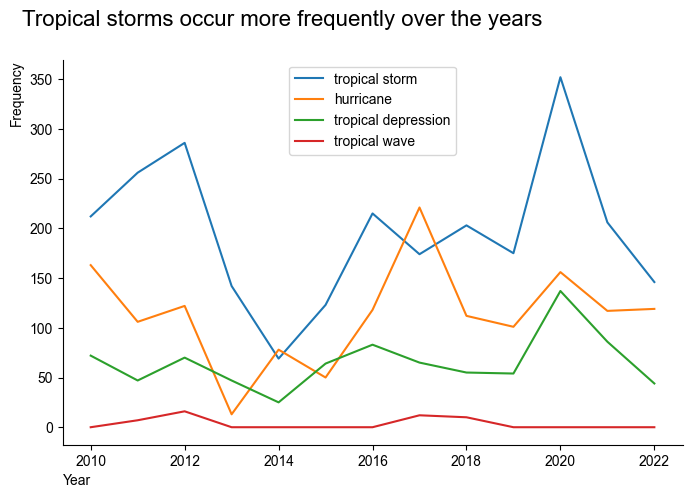

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

for value in status_values:
    tmp = df_storms[df_storms["status"]==value]
    ax.plot(tmp["year"], tmp["n"], label=value)

ax.spines[['right', 'top']].set_visible(False) 
ax.set_ylabel("Frequency", loc="top")
ax.set_xlabel("Year", loc="left")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)
#ax.set_title("Number of Storms Over Time", loc="left")

plt.legend()
plt.show()

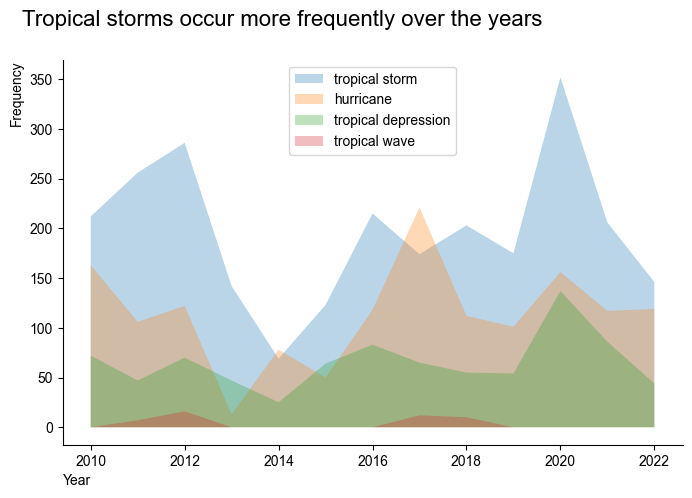

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

for value in status_values:
    tmp = df_storms[df_storms["status"]==value]
    ax.fill_between(tmp["year"], tmp["n"], label=value, alpha=0.3)

ax.spines[['right', 'top']].set_visible(False) 
ax.set_ylabel("Frequency", loc="top")
ax.set_xlabel("Year", loc="left")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)
plt.legend()
plt.show()

In [10]:
df_storms.head()

,year,status,n
0,2010,hurricane,163.0
1,2010,tropical depression,72.0
2,2010,tropical storm,212.0
3,2010,tropical wave,0.0
4,2011,hurricane,106.0


In [11]:
tmp = pd.pivot(df_storms, index="year", columns="status", values="n").reset_index()
tmp.head()

status,year,hurricane,tropical depression,tropical storm,tropical wave
0,2010,163.0,72.0,212.0,0.0
1,2011,106.0,47.0,256.0,7.0
2,2012,122.0,70.0,286.0,16.0
3,2013,13.0,47.0,142.0,0.0
4,2014,78.0,25.0,69.0,0.0


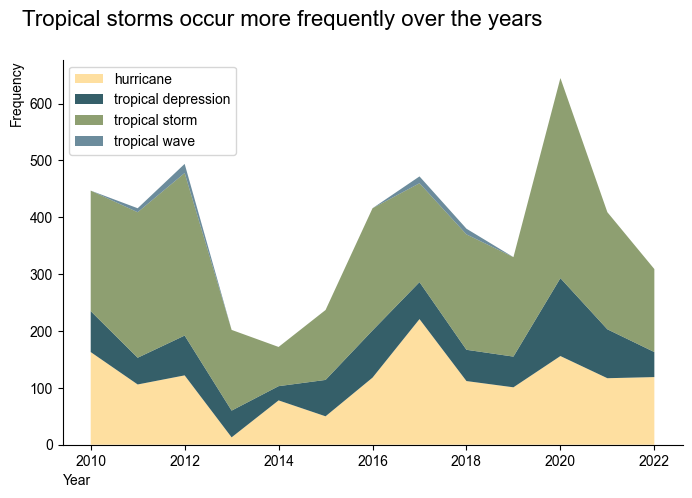

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

tmp = pd.pivot(df_storms, index="year", columns="status", values="n").reset_index()
ax.stackplot(tmp["year"], tmp["hurricane"], tmp["tropical depression"], tmp["tropical storm"], tmp["tropical wave"], alpha=0.8, labels=["hurricane", "tropical depression", "tropical storm", "tropical wave"], colors = ["#FED789", "#023743", "#72874E", "#476F84"])

ax.spines[['right', 'top']].set_visible(False) 
ax.set_ylabel("Frequency", loc="top")
ax.set_xlabel("Year", loc="left")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)
plt.legend()
plt.show()

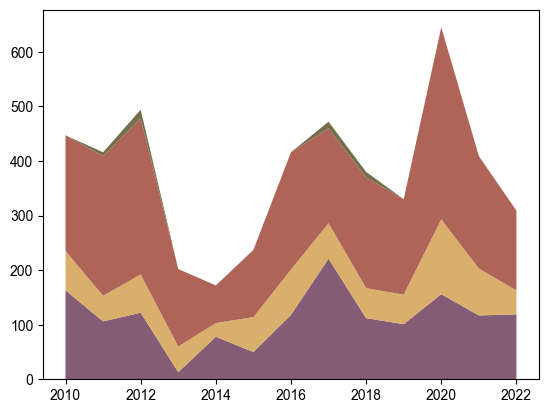

In [13]:
pivot_df = df_storms.pivot_table(
   index='year', # year is now the index
   columns='status', # column are the kind of storm
   values='n' # df content is taken from the 'n' column
)
values = [
   pivot_df[status] for status in df_storms["status"].unique()
]
cmap = load_cmap("Antique")
colors = ["#FED789", "#023743", "#72874E", "#476F84"]

fig, ax = plt.subplots()
ax.stackplot(pivot_df.index, values, colors=cmap.colors)
plt.show()

In [14]:
tmp_data = pd.pivot(df_storms,index="year", columns="status", values=["n"] )
#tmp_data.columns = tmp_data.columns.droplevel(0)

#Collapse the MultiIndex
tmp_data.columns = tmp_data.columns.map('_'.join).str.strip()
#Reset Index to get the Name column back
tmp_data = tmp_data.reset_index()
tmp_data.index = tmp_data.year
tmp_data.drop(columns=["year"], axis=1, inplace=True)
tmp_data.head()

,n_hurricane,n_tropical depression,n_tropical storm,n_tropical wave
year,,,,
2010,163.0,72.0,212.0,0.0
2011,106.0,47.0,256.0,7.0
2012,122.0,70.0,286.0,16.0
2013,13.0,47.0,142.0,0.0
2014,78.0,25.0,69.0,0.0


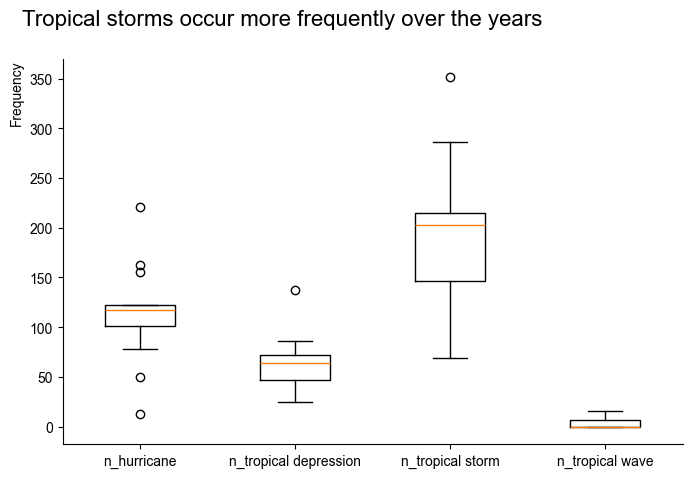

In [15]:
# You can use the column headings from the data frame as labels
labels = list(tmp_data.columns)
# A data frame needs to be converted into an array before it can be plotted this way
tmp_data = np.array(tmp_data)

fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(tmp_data, tick_labels=labels)
ax.spines[['right', 'top']].set_visible(False) 

ax.set_ylabel("Frequency", loc="top")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)

plt.show()

In [16]:
df_storms.head()

,year,status,n
0,2010,hurricane,163.0
1,2010,tropical depression,72.0
2,2010,tropical storm,212.0
3,2010,tropical wave,0.0
4,2011,hurricane,106.0


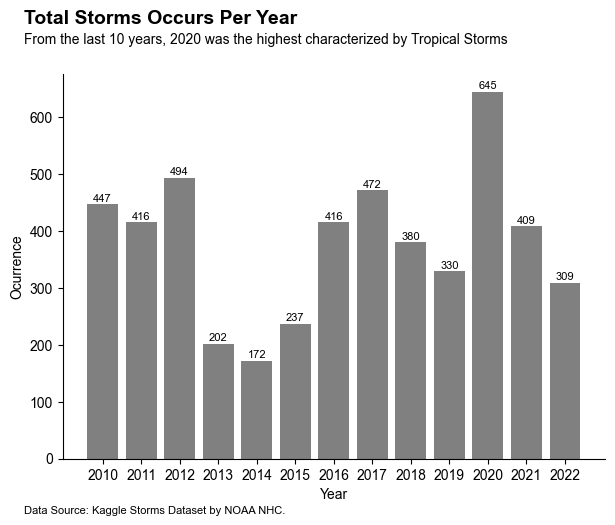

In [17]:
year_agg = df_storms.groupby(by=['year'], as_index=False).agg(
    totaltimesperyear=('n', 'sum')
)

x = year_agg['year']
y = year_agg['totaltimesperyear']

fig, ax = plt.subplots(
    figsize=(7,5)
    )

ax.bar(x, y, color='grey')

for i, value in enumerate(y):
    ax.text(x[i], value + 5, str(int(value)), ha='center', fontsize=8)

fig.text(0.07, 0.98, 'Total Storms Occurs Per Year', fontsize=14, weight='bold')
fig.text(0.07, 0.94, 'From the last 10 years, 2020 was the highest characterized by Tropical Storms', fontsize=10)
fig.text(0.07, 0.001, 'Data Source: Kaggle Storms Dataset by NOAA NHC.', fontsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Year')
plt.ylabel('Ocurrence')

plt.xticks(x)

plt.show()

# 2. Life Expectancy

# 3. Footprint

/var/folders/f3/w2fmvqr108v8svw61xkgnwcw0000gn/T/ipykernel_20497/2620377138.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('RdYlBu_r')


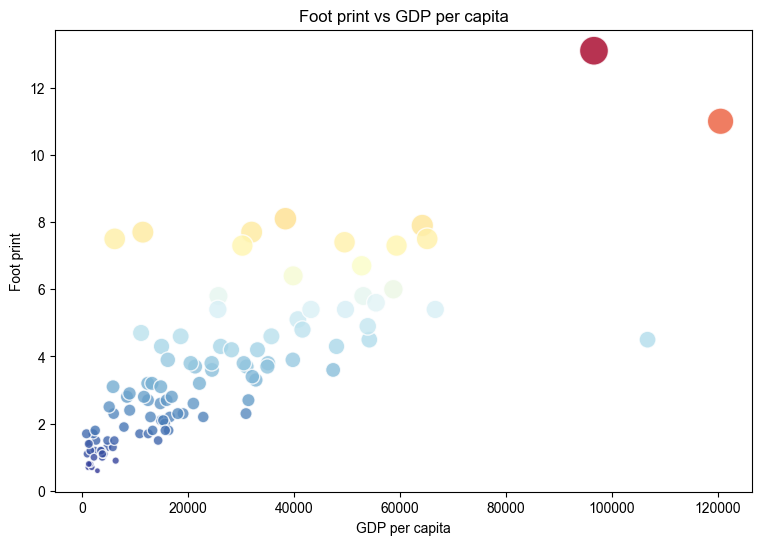

In [18]:
fig, ax = plt.subplots(figsize=(9, 6))
cm = plt.cm.get_cmap('RdYlBu_r')

scale = 50

ax.scatter(
    x=df_footprint["gdpCapita"],
    y=df_footprint["footprint"],
    s=scale*df_footprint["earthsRequired"],
    label="Earths required (proportional size)",
    c=scale*df_footprint["earthsRequired"],
    cmap=cm,
    alpha=0.8,
    edgecolors="white",
    linewidth=1,
)

ax.set_title("Foot print vs GDP per capita")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Foot print")

plt.show()

In [19]:
df_footprint.head(3)

,lifexp,country,region,gdpCapita,populationMillions,footprint,biocapacity,ecoReserve,earthsRequired,ratio
0,76.0,Albania,Other Europe,14889.0,2.9,2.1,1.176752,-0.894486,1.371485,1.784573
1,62.0,Angola,Africa,6304.0,35.0,0.9,1.588191,0.730346,0.568029,0.566682
2,75.0,Argentina,South America,22117.0,46.0,3.2,5.231663,2.011045,2.132556,0.611660


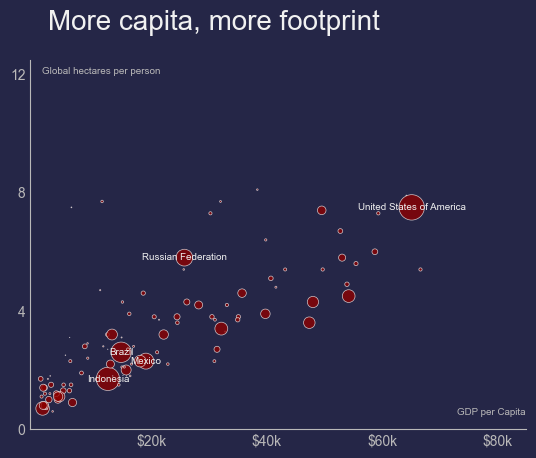

In [20]:
background_color = "#252647"
white = "#f1f1f1"
light_grey = "#bab9b9"

fig, ax = plt.subplots()
ax.scatter(df_footprint["gdpCapita"], df_footprint["footprint"], s=df_footprint["populationMillions"], 
           alpha=0.8, color="darkred", edgecolor=white, linewidth=0.5)

fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color(light_grey)
ax.tick_params(length=0)

location = [20_000, 40_000, 60_000, 80_000, 100_000]
labels = ["$20k", "$40k", "$60k", "$80k", "$100k"]
ax.set_xticks(location, labels=labels)

location = [0, 4, 8, 12]
ax.set_yticks(location, labels=location)

ax.tick_params(length=0)
ax.tick_params(
    axis="both",
    labelsize=10,
    labelcolor=light_grey,
)

ax.set_ylim(0, 12.5)
ax.set_xlim(-1000, 85_000)

subset = df_footprint[df_footprint["populationMillions"] > 100]
# Names of countries with population > 100M
for i, row in subset.iterrows():
    country = row["country"]
    x_value = row["gdpCapita"]
    y_value = row["footprint"]
    ax.text(
        x=x_value,
        y=y_value,
        s=country,
        ha="center",
        va="center",
        color=white,
        size=7,
    )

ax.text(
    x=2000,
    y=13.5,
    s="More capita, more footprint",
    size=20,
    color=white,
)

ax.text(
    x=73_000,
    y=0.5,
    s="GDP per Capita",
    color=light_grey,
    size=7,
)
ax.text(
    x=1000,
    y=12,
    s="Global hectares per person",
    color=light_grey,
    size=7,
)

plt.show()

# Projects

## Disasters

In [21]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/natural-disasters/natural-disasters.csv"
df_disasters = pd.read_csv(url)
df_disasters.head()

,Year,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Volcanic activity,Wet mass movement,Wildfire
0,1960,1.0,8.0,14.0,20.0,8.0,1.0,2.0,2.0
1,1961,1.0,3.0,1.0,14.0,9.0,5.5,2.0,2.0
2,1962,1.0,4.0,1.0,13.0,8.0,5.0,2.0,2.0
3,1963,1.0,3.0,2.0,21.0,8.0,3.0,2.0,2.0
4,1964,8.0,7.0,14.5,22.0,22.0,1.0,1.0,1.0


In [22]:
from pyfonts import load_font

font = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/roboto/Roboto%5Bwdth%2Cwght%5D.ttf?raw=true")


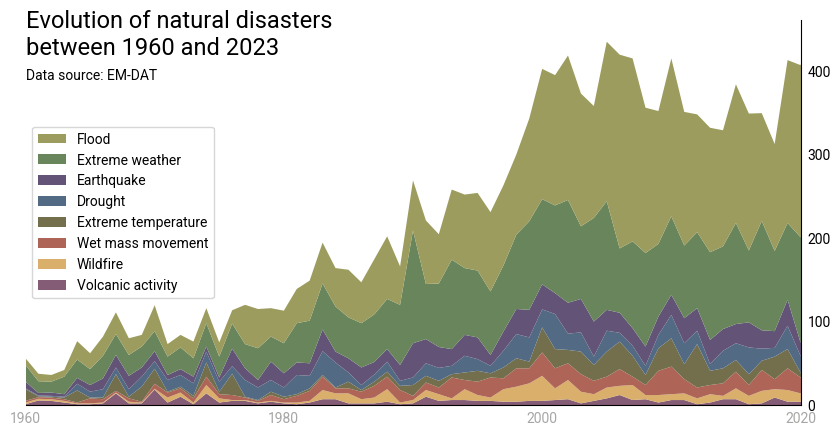

In [23]:
from matplotlib.font_manager import FontProperties

#font = FontProperties(fname="https://github.com/google/fonts/blob/main/ofl/roboto/Roboto%5Bwdth%2Cwght%5D.ttf?raw=true")

columns = df_disasters.drop(columns="Year").sum().sort_values().index.to_list()
x = df_disasters["Year"]
y = np.stack(df_disasters[columns].values, axis=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.text(
   x=1960,
   y=420,
   s="Evolution of natural disasters\nbetween 1960 and 2023",
   size=17,
   #fontproperties=font
   font = font
)

ax.text(x=1960, y=390, s="Data source: EM-DAT", size=10, fontproperties=font)

# Axis Y to the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

cmap = load_cmap("Antique")

location = [1960, 1980, 2000, 2020]
labels = ["1960", "1980", "2000", "2020"]
ax.set_xticks(location)
ax.set_xticklabels(labels, color='#A6A6A5')

ax.stackplot(x, y, colors=cmap.colors, labels=columns)

ax.set_xlim(1960, 2020)
ax.spines[["top", "left"]].set_visible(False)
ax.tick_params(length=0, pad=5)

ax.legend(reverse=True, loc="center left", fontsize=10, prop=font)

ax.title.set_fontproperties(font)
ax.xaxis.label.set_fontproperties(font)
ax.yaxis.label.set_fontproperties(font)


# Apply the font to all text elements in the figure
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_legend().get_texts()):
   label.set_fontproperties(font)

plt.show()

## Neighborhood

In [24]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/newyork-airbnb/newyork-airbnb.csv"
df_neigh = pd.read_csv(url)

df_neigh.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [25]:
df_agg = (
    df_neigh["neighbourhood"]
    .value_counts()
    .head(10)
    .to_frame(name="count")
    .reset_index()
    .rename(columns={"index": "neighbourhood"})
    .sort_values("count")
)
labels = df_agg["neighbourhood"]
values = df_agg["count"]

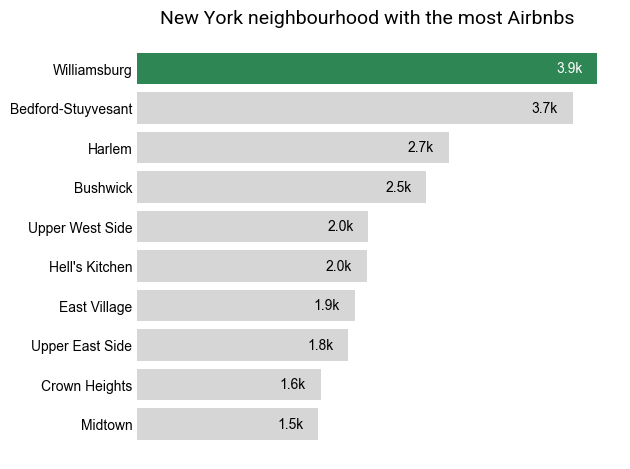

In [26]:
fig, ax = plt.subplots(layout="tight")

color_mapping = {True: "#2d8653", False: "#d6d6d6"}
colors = (labels == "Williamsburg").map(color_mapping)

ax.barh(labels, values, color=colors)
ax.set_xticks([])
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.tick_params(length=0)

ax.text(
   x=3920 / 2,
   y=10.5,
   s="New York neighbourhood with the most Airbnbs",
   ha="center",
   va="top",
   size=14,
   font = font
)
   
for i in range(len(values)):
   value = values[i]
   if i == 0:
      color = "white"
   else:
      color = "black"
   format_value = f"{value / 1000:.1f}k"
   ax.text(
      x=value - 350, y=len(values) - 1 - i, s=format_value, va="center", color=color
   )

## Wine

In [27]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/wine/wine.csv"
df = pd.read_csv(url)

df_agg = df.groupby("quality", as_index=False).median()
df_agg.head()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,3,11.1,0.9900,1.02,43.700,0.256,177.30,289.4,1.01701,3.11,1.24,11.6
1,4,10.9,0.9600,0.99,42.400,0.251,172.00,278.8,1.01631,3.12,1.23,11.6
2,5,7.6,0.4425,0.38,7.800,0.072,40.00,155.0,0.99730,3.18,0.56,10.0
3,6,7.0,0.2800,0.32,3.725,0.047,31.00,121.0,0.99492,3.21,0.52,10.5
4,7,9.7,0.7600,0.81,35.000,0.191,135.95,226.1,1.01097,3.16,1.03,11.7


In [28]:
df_agg[["quality", "residual_sugar"]]

,quality,residual_sugar
0,3,43.700
1,4,42.400
2,5,7.800
3,6,3.725
4,7,35.000
5,8,43.100
6,9,43.600


In [29]:
font = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/lato/Lato-SemiBold.ttf?raw=true")
font_light = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/lato/Lato-Light.ttf?raw=true")

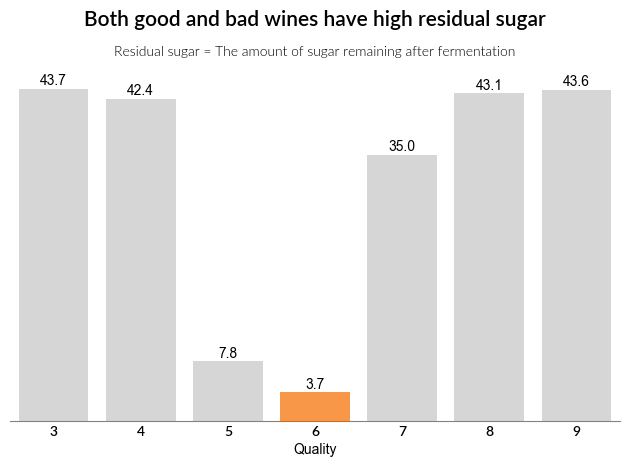

In [30]:
fig, ax = plt.subplots(layout="tight")

color_mapping = {True: '#F79747', False: "#d6d6d6"}
colors = (df_agg["quality"] == 6).map(color_mapping)


ax.bar(
  df_agg["quality"],
  df_agg["residual_sugar"],
  color=colors,
)

ax.set_xlabel("Quality")
#ax.set_ylabel("Residual Sugar")
ax.set_yticks([])
ax.text(
  x=6,
  y=52,
  s="Both good and bad wines have high residual sugar",
  size=15,
  ha="center",
  font = font
)
ax.text(
  x=6,
  y=48,
  s="Residual sugar = The amount of sugar remaining after fermentation",
  size=10,
  #color="red",
  ha="center",
  font = font_light
)

ax.spines[["top", "right", "left"]].set_visible(False)
ax.spines["bottom"].set_color('#828282')
ax.tick_params(axis="both", length=0,)


for i, row in df_agg.iterrows():
    country = round(row["residual_sugar"], 1)
    x_value = row["quality"]
    y_value = row["residual_sugar"] +1
    ax.text(
        x=x_value,
        y=y_value,
        s=country,
        ha="center",
        va="center",
        color="black",
        size=10,
    )
ax.set_xlim(2.5, 9.5)
# Apply the font to all text elements in the figure
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
   label.set_fontproperties(font)

plt.show()

# 4. Random

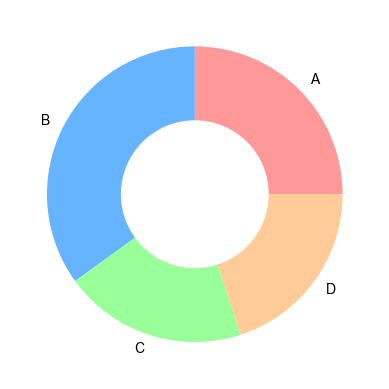

In [31]:
sizes = [25, 35, 20, 20]
labels = ["A", "B", "C", "D"]
colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors)
ax.pie([1], colors="white", radius=0.5)
plt.show()

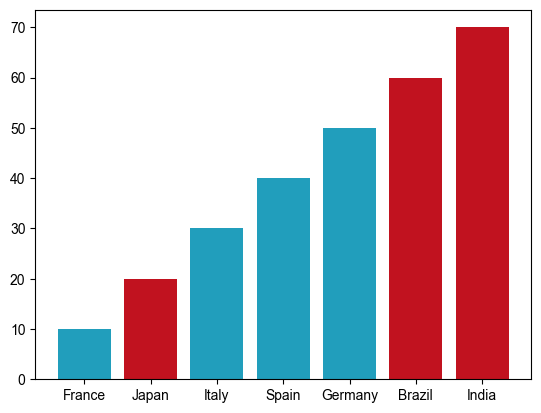

In [32]:
y = [10, 20, 30, 40, 50, 60, 70]
labels = [
   "France", "Japan", "Italy", "Spain",
   "Germany", "Brazil", "India"
]
continents = [
   "Europe", "Asia", "Europe", "Europe",
   "Europe", "South America", "Asia"
]

blue = "#219ebc"
red = "#c1121f"
colors = [
   blue if continent == "Europe" else red
   for continent in continents
]

fig, ax = plt.subplots()
ax.bar(labels, y, color=colors)
plt.show()


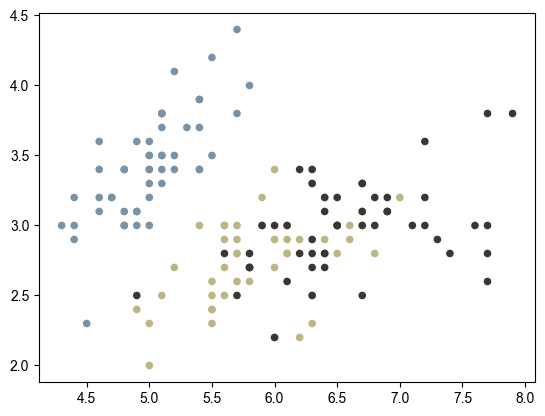

In [33]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/refs/heads/master/static/data/iris.csv"
iris = pd.read_csv(url)

x = iris["sepal_length"]
y = iris["sepal_width"]
c = pd.Categorical(iris["species"]).codes

cmap = load_cmap("Alosa_fallax")

fig, ax = plt.subplots()
ax.scatter(x, y, c=c, cmap=cmap, s=20)
plt.show()

In [34]:
#pip install geopandas

In [35]:

# import matplotlib.pyplot as plt
# import pandas as pd
# import geopandas as gpd
# import contextily as cx

# url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/newyork-airbnb/newyork-airbnb.csv"
# df = pd.read_csv(url)


# gdf = gpd.GeoDataFrame(
#     df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
# ).to_crs(epsg=3857)


# fig, ax = plt.subplots(figsize=(10, 9))

# gdf.loc[lambda x: x.neighbourhood_group == "Manhattan"].plot(
#     column="price",
#     ax=ax,
#     alpha=0.2,
#     legend=True,
#     scheme="Quantiles",
#     classification_kwds={"k": 10},
#     categorical=True,
#     markersize=5,
# )

# ax.get_legend().set_title("Price per night ($)")


# cx.add_basemap(ax, zoom=13)
# ax.axis("off")
# ax.set_title("Better Airbnb deals in the north of Manhattan")
# plt.tight_layout()


# #fig.savefig("NY_airbnb_price.png", dpi=500)

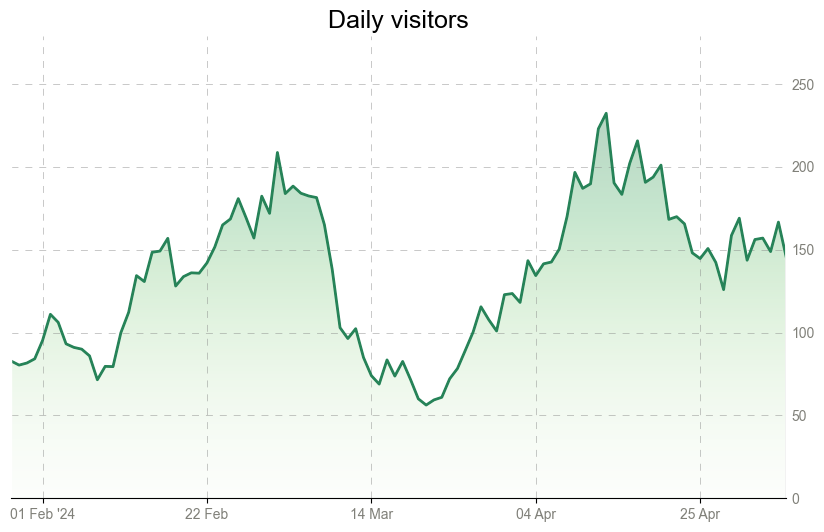

In [36]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib.path import Path
from matplotlib.patches import PathPatch

np.random.seed(38)

# Data generation
dates = pd.date_range(start='2024-02-01', periods=100, freq='D')
initial_rate = 75
drift = 0.003
volatility = 0.1
returns = np.random.normal(drift, volatility, len(dates))
rates = initial_rate * np.cumprod(1 + returns)

x, y = dates, rates

# General parameters
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Daily visitors", fontsize=18, color="black")
#rcParams['font.family'] = 'DejaVu Sans'
#rcParams['font.size'] = 14

# Axis Y to the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# Axis
x_interval = 21
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=x_interval))

ax.yaxis.set_major_locator(ticker.MultipleLocator(50))

# Grid
ax.grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax.tick_params(axis='y', length=0)

# Add year to the first date on the axis
def custom_date_formatter(t, pos, dates, x_interval):
    date = dates[pos*x_interval]
    if pos == 0:
        return date.strftime('%d %b \'%y')  
    else:
        return date.strftime('%d %b')  
ax.xaxis.set_major_formatter(ticker.FuncFormatter((lambda x, pos: custom_date_formatter(x, pos, dates=dates, x_interval=x_interval))))

# Ticks label color
[t.set_color('#808079') for t in ax.yaxis.get_ticklabels()]
[t.set_color('#808079') for t in ax.xaxis.get_ticklabels()]


# Gradient
numeric_x = np.array([i for i in range(len(x))])
numeric_x_patch = np.append(numeric_x, max(numeric_x))
numeric_x_patch = np.append(numeric_x_patch[0], numeric_x_patch)
y_patch = np.append(y, 0)
y_patch = np.append(0, y_patch)

path = Path(np.array([numeric_x_patch, y_patch]).transpose())
patch = PathPatch(path, facecolor='none')
plt.gca().add_patch(patch)

ax.imshow(numeric_x.reshape(len(numeric_x), 1),  interpolation="bicubic",
                cmap=plt.cm.Greens, 
                origin='lower',
                alpha=0.3,
                extent=[min(numeric_x), max(numeric_x), min(y_patch), max(y_patch) * 1.2], 
                aspect="auto", clip_path=patch, clip_on=True)

# Plotting main line
y_chart = y_patch
y_chart[0] = y_chart[1]
y_chart[-1] = y_chart[-2]
ax.plot(numeric_x_patch, y_chart, color='#268358', linewidth=2)

# fix a grey line of imshow
ax.plot([max(numeric_x_patch), max(numeric_x_patch)], [0, max(y)], color='white', linewidth=2)

#plt.savefig('high_quality_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## Legend and Annotation

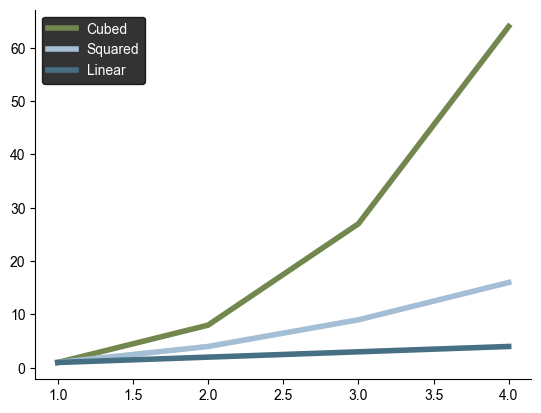

In [37]:
x = [1, 2, 3, 4]
y1 = [1, 2, 3, 4]
y2 = [1, 4, 9, 16]
y3 = [1, 8, 27, 64]
colors = ["#476F84", "#A4BED5", "#72874E"]

fig, ax = plt.subplots()

ax.plot(x, y3, label="Cubed", color=colors[2], lw=4)
ax.plot(x, y2, label="Squared", color=colors[1], lw=4)
ax.plot(x, y1, label="Linear", color=colors[0], lw=4)
ax.spines[["top", "right"]].set_visible(False)

# 3 arguments for the 3 colors: background, edge and label
ax.legend(
  facecolor="black",
  edgecolor="black",
  labelcolor="white",
)



plt.show()

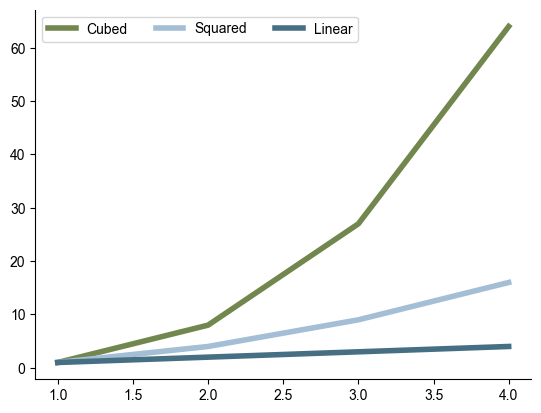

In [38]:
x = [1, 2, 3, 4]
y1 = [1, 2, 3, 4]
y2 = [1, 4, 9, 16]
y3 = [1, 8, 27, 64]
colors = ["#476F84", "#A4BED5", "#72874E"]

fig, ax = plt.subplots()

ax.plot(x, y3, label="Cubed", color=colors[2], lw=4)
ax.plot(x, y2, label="Squared", color=colors[1], lw=4)
ax.plot(x, y1, label="Linear", color=colors[0], lw=4)
ax.spines[["top", "right"]].set_visible(False)

# Change the number of columns to make it horizontal
ax.legend(ncols=3, loc="upper left")

plt.show()

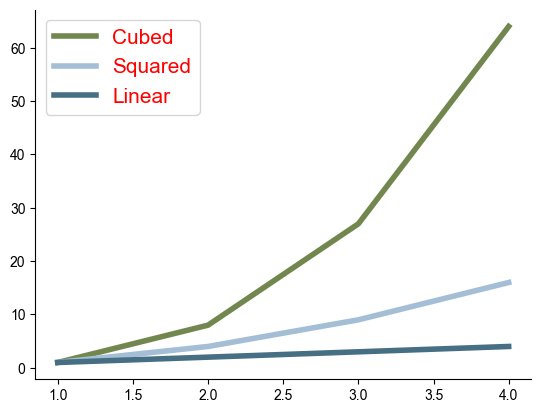

In [39]:
fig, ax = plt.subplots()

ax.plot(x, y3, label="Cubed", color=colors[2], lw=4)
ax.plot(x, y2, label="Squared", color=colors[1], lw=4)
ax.plot(x, y1, label="Linear", color=colors[0], lw=4)
ax.spines[["top", "right"]].set_visible(False)

# Legend
ax.legend(labelcolor="red", fontsize=15)

plt.show()

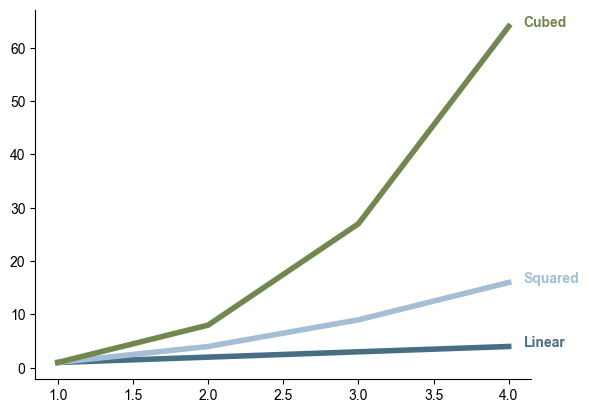

In [40]:
fig, ax = plt.subplots()

ax.plot(x, y1, color=colors[0], lw=4)
ax.plot(x, y2, color=colors[1], lw=4)
ax.plot(x, y3, color=colors[2], lw=4)
ax.spines[["top", "right"]].set_visible(False)

ax.text(
  x=4.1, y=4, s="Linear", color=colors[0], weight="bold"
)
ax.text(
  x=4.1, y=16, s="Squared", color=colors[1], weight="bold"
)
ax.text(
  x=4.1, y=64, s="Cubed", color=colors[2], weight="bold"
)
plt.show()

Text(7, 3.4, 'Virginica')

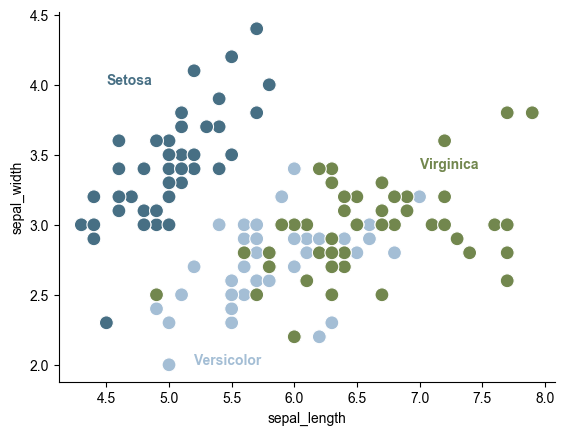

In [41]:
import seaborn as sns

url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/refs/heads/master/static/data/iris.csv"
iris = pd.read_csv(url)

colors = ["#476F84", "#A4BED5", "#72874E"]

x = iris["sepal_length"]
y = iris["sepal_width"]
c = iris["species"]

fig, ax = plt.subplots()
sns.scatterplot(
  x=x, y=y, hue=c, s=100,
  legend=False,
  palette=colors,
)
ax.spines[["top", "right"]].set_visible(False)
ax.text(x=4.5, y=4, s="Setosa", weight="bold", color=colors[0])
ax.text(x=5.2, y=2, s="Versicolor", weight="bold", color=colors[1])
ax.text(x=7, y=3.4, s="Virginica", weight="bold", color=colors[2])

Text(2023.5, 15, 'Earthquake')

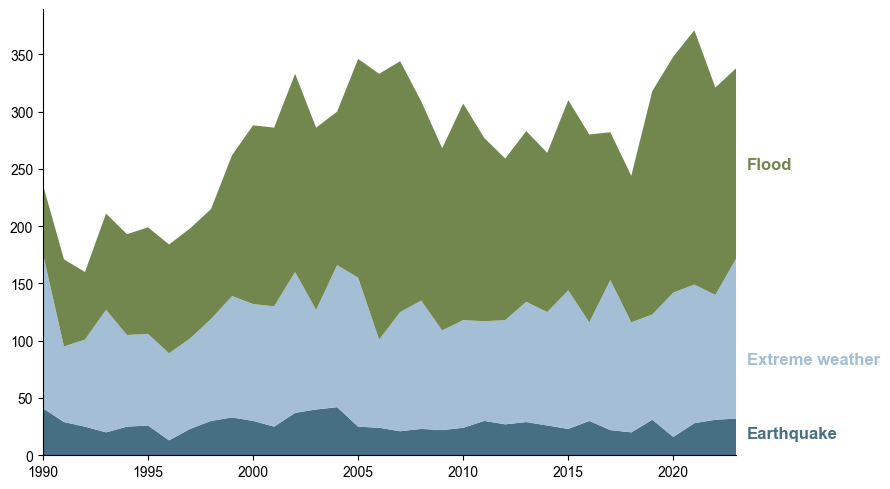

In [42]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/natural-disasters/natural-disasters.csv"
df = pd.read_csv(url)
df = df[["Year", "Flood", "Extreme weather", "Earthquake"]]
df = df[df["Year"] >= 1990]

columns = df.drop(columns="Year").sum().sort_values().index.to_list()
x = df["Year"]
y = np.stack(df[columns].values, axis=-1)

colors = ["#476F84", "#A4BED5", "#72874E"]

fig, ax = plt.subplots(figsize=(9, 5), layout="tight")

ax.stackplot(x, y, colors=colors)
ax.spines[["top", "right"]].set_visible(False)
ax.set_xlim(1990, 2023)

text_arg = dict(weight="bold", size=12)
ax.text(x=2023.5, y=250, s="Flood", color=colors[2], **text_arg)
ax.text(x=2023.5, y=80, s="Extreme weather", color=colors[1], **text_arg)
ax.text(x=2023.5, y=15, s="Earthquake", color=colors[0], **text_arg)

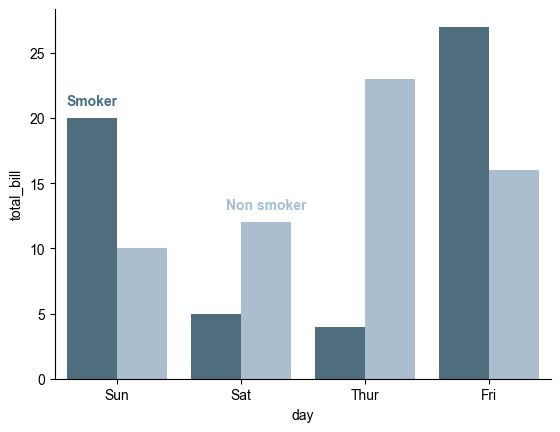

In [43]:
df = pd.DataFrame({
    "day": ["Sun", "Sun", "Sat", "Sat", "Thur", "Thur", "Fri", "Fri"],
    "total_bill": [20, 10, 5, 12, 23, 4, 27, 16],
    "smoker": ["Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No"]
})
colors = ["#476F84", "#A4BED5"]

fig, ax = plt.subplots()
sns.barplot(
  x=df["day"],
  y=df["total_bill"],
  hue=df["smoker"],
  palette=colors,
  ax=ax, legend=False
)
ax.spines[["top", "right"]].set_visible(False)

text_style = dict(ha="center", weight="bold")
ax.text(
  x=-0.2, y=21, s="Smoker", color=colors[0], **text_style
)
ax.text(
  x=1.2, y=13, s="Non smoker", color=colors[1], **text_style
)
plt.show()

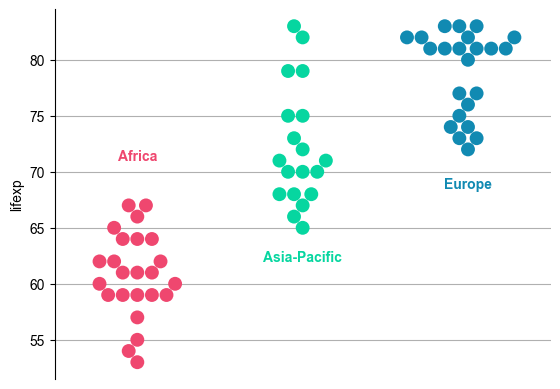

In [44]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/footprint/footprint.csv"
df = pd.read_csv(url)
df = df[df["region"].isin(
   ["Africa", "EU-27", "Asia-Pacific"]
)]

x = df["region"]
y = df["lifexp"]

colors = ["#ef476f", "#06d6a0", "#118ab2"]

fig, ax = plt.subplots()

sns.swarmplot(
  x=x, y=y, hue=x,
  palette=colors,
  size=10,
  ax=ax
)
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.grid(axis="y")
ax.set_xlabel("")
ax.set_xticks([])

text_arg = dict(weight="bold", ha="center")
ax.text(x=0, y=71, s="Africa", color=colors[0], **text_arg)
ax.text(x=1, y=62, s="Asia-Pacific", color=colors[1], **text_arg)
ax.text(x=2, y=68.5, s="Europe", color=colors[2], **text_arg)
plt.show()

## Title and Text

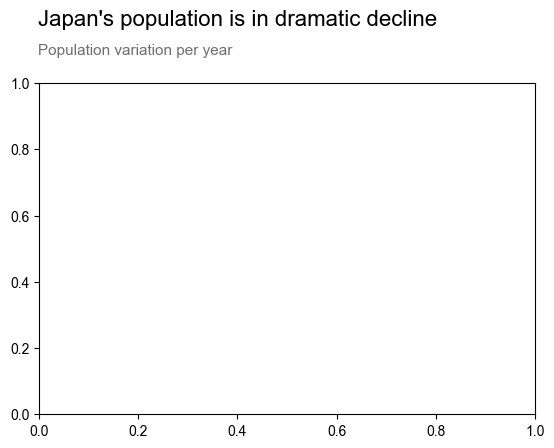

In [45]:
fig, ax = plt.subplots()

# Adjust top margin
fig.subplots_adjust(top=0.8)
# This function is necessary to create space above the chart for the title. 
# In this case, setting top=0.8 means that the chart will occupy only 80% of the figure’s height, leaving room for the title.

# Title
fig.text(
  x=.124,
  y=.92,
  s="Japan's population is in dramatic decline",
  size=16,
)

# Subtitle
fig.text(
  x=.124,
  y=.86,
  s="Population variation per year",
  size=11,
  color="#6E6E6E"
)

plt.show()

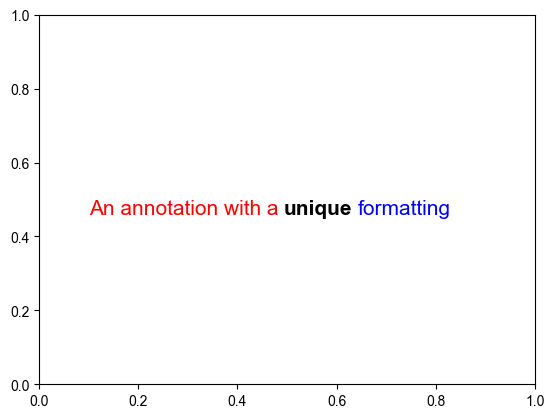

In [46]:
fig, ax = plt.subplots()

ax_text(
  x=0.1, y=0.5,
  s="An annotation with a <unique> <formatting>",
  color="red",
  ax=ax, size=15,
  highlight_textprops=[
    {"color": "black", "weight": "bold"},
    {"color": "blue"},
  ],
)

plt.show()

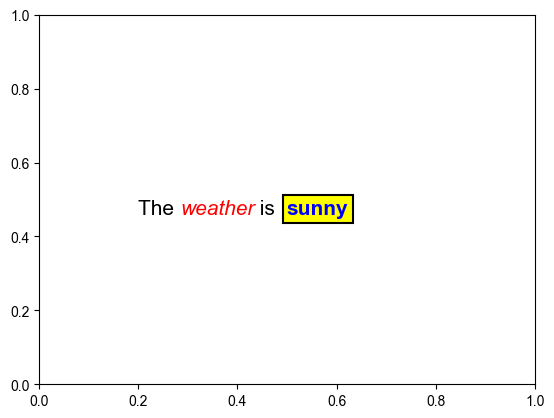

In [47]:
fig, ax = plt.subplots()

ax_text(
    x=0.2,
    y=0.5,
    s="The <weather> is  <sunny>",
    ax=ax, size=15,
    highlight_textprops=[
      {"style": "italic", "color": "red"},
      {
      "color": "blue",
      "weight": "bold",
      "bbox": {
          "edgecolor": "black", # border color
          "facecolor": "yellow", # background color
          "linewidth": 1.5, # border width
          "pad": 3, # padding
      }
}])

plt.show()

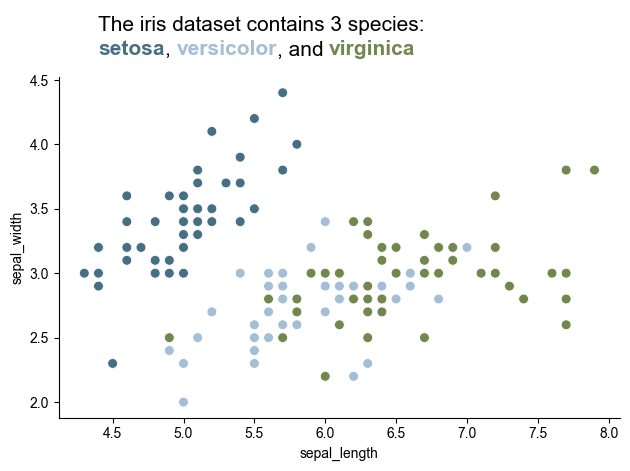

In [48]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/refs/heads/master/static/data/iris.csv"
iris = pd.read_csv(url)

colors = ["#476F84", "#A4BED5", "#72874E"]

x = iris["sepal_length"]
y = iris["sepal_width"]
c = iris["species"]

fig, ax = plt.subplots(layout="tight")
ax.spines[["top", "right"]].set_visible(False)
sns.scatterplot(
  x=x, y=y, hue=c, s=50, legend=False, palette=colors,
)

text = "The iris dataset contains 3 species:\n<setosa>, <versicolor>, and <virginica>"
ax_text(
    x=4.4, y=5, s=text,
    fontsize=15, color='black',
    highlight_textprops=[
      {"color": colors[0], 'fontweight': 'bold'},
      {"color": colors[1], 'fontweight': 'bold'},
      {"color": colors[2], 'fontweight': 'bold'}
    ],
)
plt.show()

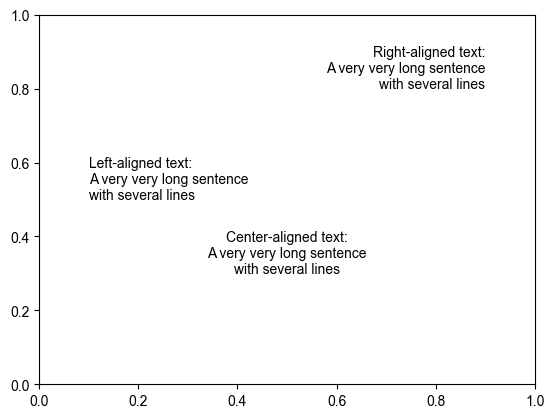

In [49]:
fig, ax = plt.subplots()

ax.text(
  x=0.1, y=0.5,
  s="Left-aligned text:\nA very very long sentence\nwith several lines",
  ha="left"  # explicitly setting left alignment
)

ax.text(
  x=0.5, y=0.3,
  s="Center-aligned text:\nA very very long sentence\nwith several lines",
  ha="center"  # horizontally centered alignment
)

ax.text(
  x=0.9, y=0.8,
  s="Right-aligned text:\nA very very long sentence\nwith several lines",
  ha="right"  # horizontally right-aligned
)

plt.show()

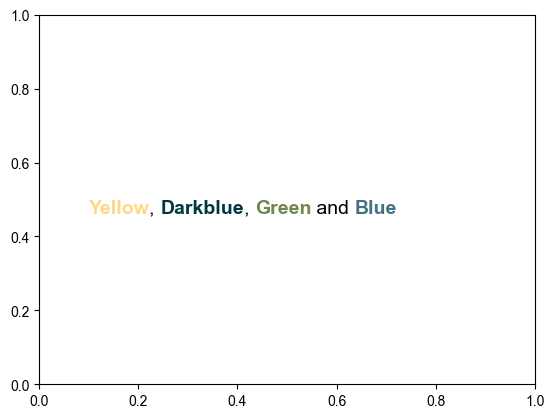

In [50]:
data = np.random.randn(20, 20)
cmap = load_cmap("Acadia")

fig, ax = plt.subplots()

ax_text(
    x=0.1,
    y=0.5,
    s="<Yellow>, <Darkblue>, <Green> and <Blue>",
    size=14,
    highlight_textprops=[
        {"color": cmap(0), "weight": "bold"},
        {"color": cmap(1), "weight": "bold"},
        {"color": cmap(2), "weight": "bold"},
        {"color": cmap(3), "weight": "bold"},
    ],
)
plt.show()

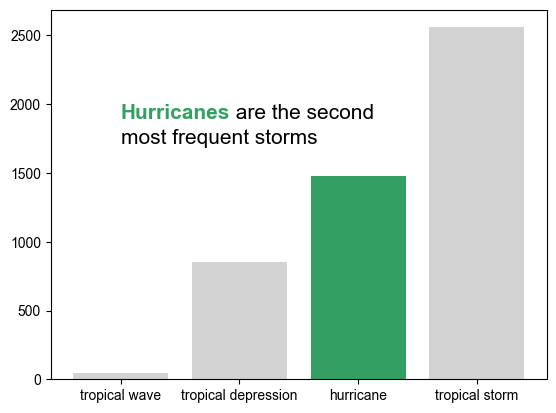

In [51]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/storms/storms.csv"
storms = pd.read_csv(url)
df = storms.groupby("status", as_index=False)["n"].sum()
df = df.sort_values("n")

labels = df["status"]
y = df["n"]

color_mapping = {
  True: "#339f62",
  False: "lightgrey"
}
colors = (df["status"] == "hurricane").map(color_mapping)

fig, ax = plt.subplots()
ax.bar(labels, y, color=colors)

ax_text(
    x=0,
    y=2000,
    s="<Hurricanes> are the second\nmost frequent storms",
    size=15,
    highlight_textprops=[{"color": "#339f62", "weight": "bold"}],
)
plt.show()